#1 Import Libraries and Load Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Load the feature-selected data
df = pd.read_csv('../data/final_feature_dataset.csv')
# Convert multiclass target to binary if not already done
df['target'] = (df['target'] > 0).astype(int)

# Prepare data
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data loaded and split successfully.")

Data loaded and split successfully.


#2 Method 1 - Randomized Search CV

In [2]:
# Define the hyperparameter grid for Randomized Search
param_dist = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
    'max_depth': [None] + [int(x) for x in np.linspace(10, 110, num=11)],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the model and Randomized Search
rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(
    estimator=rf, 
    param_distributions=param_dist, 
    n_iter=100, # Number of random combinations to try
    cv=5,       # 5-fold cross-validation
    verbose=2, 
    random_state=42, 
    n_jobs=-1   # Use all available CPU cores
)

# Fit the random search model
random_search.fit(X_train, y_train)

print("\n--- Best Parameters from Randomized Search ---")
print(random_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits

--- Best Parameters from Randomized Search ---
{'n_estimators': 900, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 80, 'bootstrap': True}


#3 Method 2 - Grid Search CV

In [3]:
# Create a more focused parameter grid based on Randomized Search results
param_grid = {
    'n_estimators': [800, 900, 1000], # Example values around the best find
    'max_depth': [None],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2],
    'bootstrap': [False]
}

# Initialize Grid Search
grid_search = GridSearchCV(
    estimator=rf, 
    param_grid=param_grid, 
    cv=5, 
    verbose=2, 
    n_jobs=-1
)

# Fit the grid search model
grid_search.fit(X_train, y_train)

print("\n--- Best Parameters from Grid Search ---")
print(grid_search.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits

--- Best Parameters from Grid Search ---
{'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000}


#4 Evaluate the Final Tuned Model


--- Performance of the Tuned Model on the Test Set ---
              precision    recall  f1-score   support

           0       0.87      0.82      0.84        33
           1       0.80      0.86      0.83        28

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



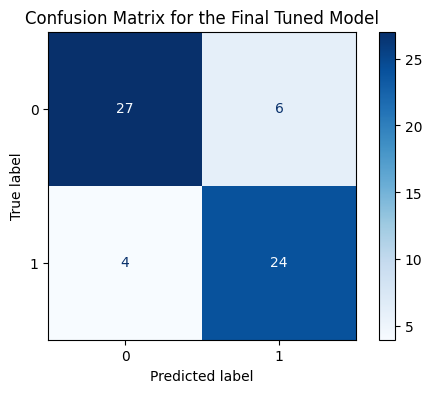

In [6]:
import matplotlib.pyplot as plt
# Get the best estimator from the search
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Print the final performance report
print("\n--- Performance of the Tuned Model on the Test Set ---")
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(6, 4))
ConfusionMatrixDisplay.from_estimator(best_rf_model, X_test, y_test, ax=ax, cmap='Blues')
plt.title('Confusion Matrix for the Final Tuned Model')
plt.show()

Saving the Final Model

In [7]:
import joblib

# The best model is stored in grid_search.best_estimator_
final_model = grid_search.best_estimator_
model_path = '../models/final_model.pkl'

# Save the model to the specified path
joblib.dump(final_model, model_path)

print(f"Final model saved to: {model_path}")

# Optional: Load the model back to verify it works
loaded_model = joblib.load(model_path)
print("\nModel loaded successfully. Ready for deployment.")

Final model saved to: ../models/final_model.pkl

Model loaded successfully. Ready for deployment.
